In [2]:
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import json

In [3]:
testdata=pd.read_csv('../data/invest_cleaned.csv')
testdata

,company_name,company_lng,company_lat,invested_company_name,invested_company_lng,invested_company_lat,company_registered_address,company_area_code,company_industry_code,invested_company_registered_address,invested_company_area_code,invested_company_industry_code,stock_percentage,should_capi,invest_regi_capi
0,百色市红日房地产开发有限责任公司,106.616688,23.904246,那坡县红日投资实业有限公司,105.840914,23.398263,百色市城北二路１４号,451000,K7010,那坡县城厢镇百马路157-1号,451026,L7212,1.0000,1000.00,1000万
1,佛山市卓信房地产投资发展有限公司,113.214618,23.016514,佛山市恒轮置业投资有限公司,113.028711,22.838297,佛山市南海区桂城街道文华北路23号星晖园综合办公楼五层之一(住所申报),440605,K7010,佛山市南海区九江镇奇山开发区奇腾路9号822室,440605,K7000,0.0550,19.25,350万元人民币
2,重庆绿色产业有限公司,106.468517,29.569209,重庆天演生物技术有限责任公司,106.469771,29.573659,重庆市沙坪坝区沙南街43号,500106,A0190,沙坪坝区沙南街43号7楼,500106,C2761,0.3576,89.40,250万元
3,内蒙古风盛新能源有限公司,111.684023,40.829470,内蒙古金杰科技股份有限公司,109.895208,40.637444,内蒙古自治区呼和浩特市赛罕区新华大街万达广场写字楼A座1306室,150105,D4400,内蒙古自治区包头市白云鄂博矿区稀土路2号蒙古王府旁203房间B,150200,C3400,NaN,NaN,9179万
4,四川诚翔服饰集团有限公司,104.158521,30.635285,四川诚翔纺织品有限公司,104.649891,30.510454,成都市成华区万科北街18号7栋1单元1层1号,510000,F5132,成都市成华区青龙乡站东村四组1幢2层B129号,510108,F5131,0.7000,2100.00,3000万元人民币
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321822,中海企业发展集团有限公司,113.959075,22.539179,宁波中海海富房地产有限公司,121.556526,29.814642,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,浙江省宁波市鄞州区首南街道天童南路555号805室-3,330212,K7010,1.0000,2000.00,2000万元人民币
321823,中海企业发展集团有限公司,113.959075,22.539179,太原中海仲兴房地产开发有限公司,112.536057,37.861494,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,太原市万柏林区晋祠路一段8号9幢1层0101号,140100,K7010,1.0000,5000.00,5000万元人民币
321824,中海企业发展集团有限公司,113.959075,22.539179,北京安泰兴业置业有限公司,116.186529,39.919897,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,北京市石景山区古城西路６６号院１号楼１０１,110107,K7010,1.0000,1000.00,1000万元人民币
321825,中海企业发展集团有限公司,113.959075,22.539179,北京中海地产有限公司,116.807322,40.364279,深圳市南山区粤海街道高新区社区科技南八路2号豪威科技大厦1401,440300,K7010,北京市密云区西大桥路69号密云区投资促进局办公楼316室—518,110228,K7010,1.0000,5000.00,5000万元人民币


# enterprise investment relationship network

In [1]:
import os

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import shapefile
from tqdm import tqdm

100%|█████████████████████████████████████████████████████████████████████████| 321827/321827 [09:53<00:00, 542.16it/s]


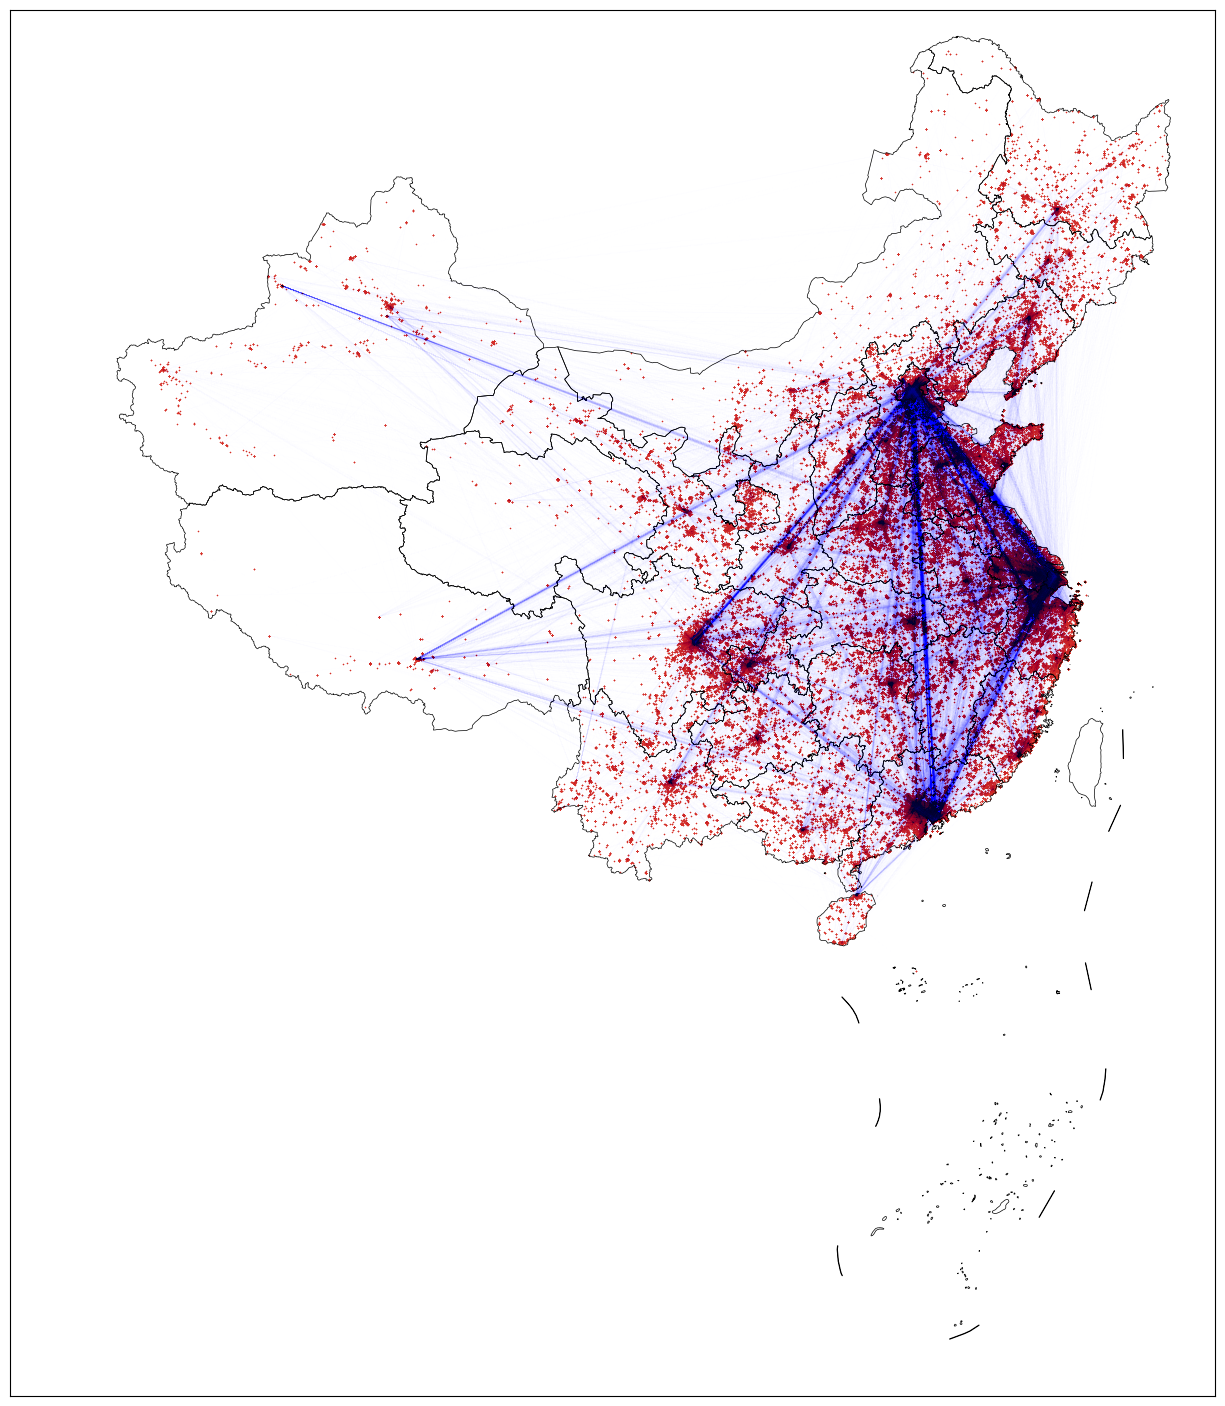

In [5]:
# every enterprise
plt.rcParams['figure.figsize'] = (30.0, 18.0) 
m7= Basemap(llcrnrlon=80, llcrnrlat=0, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
m7.readshapefile( "../data/map/china", 'china', drawbounds=True)
longitudes = list(testdata['company_lng'])+list(testdata['invested_company_lng'])
latitudes = list(testdata['company_lat'])+list(testdata['invested_company_lat'])

# ind=[i for i in range(645060) if 119.30<=longitudes[i]<=124.575 and 20.7569<=latitudes[i]<=25.94]
# longitudes=[longitudes[i] for i in range(645060) if (i not in ind)]
# latitudes=[latitudes[i] for i in range(645060) if (i not in ind)]

longitudes, latitudes = m7(longitudes, latitudes)
m7.scatter(longitudes, latitudes, s=0.001, marker='*',facecolors='#d73027',edgecolors='#d73027') 

for i in tqdm(range(321827)):
    a,b,c,d = testdata.loc[i][['company_lng','company_lat','invested_company_lng','invested_company_lat']]
    m7.plot([a,c],[b,d],linewidth=0.001,color='b',latlon='True')
plt.show()
# plt.savefig('a.png')

# power law distribution

In [10]:
comlst=set(testdata['company_name'].tolist()+testdata['invested_company_name'].tolist())
comlst=list(comlst)
comlst

['混沌天成期货股份有限公司',
 '安吉县林业产业管理有限公司',
 '青岛经济技术开发区昆泉房地产开发有限公司',
 '深圳市曼思诺食品有限公司',
 '舟山聚邦科技有限公司',
 '上海开信仓储有限公司',
 '邯郸保利筑善房地产开发有限公司',
 '深圳市君尚德科技有限公司',
 '海南京豪钢铁进出口有限公司',
 '武汉光谷宝益健康科技有限公司',
 '上海浦虹工贸实业公司',
 '青岛财达家电有限公司',
 '深圳市国电新能源产业发展有限公司',
 '广东广宁农村商业银行股份有限公司',
 '四会市下茆镇经济实业发展总公司',
 '上海致力健康信息咨询服务有限公司',
 '北京晨星成长教育科技有限公司',
 '中冶赛迪电气技术有限公司',
 '福建漳平余热发电有限责任公司',
 '江门市蓬江区白石不锈钢精铸厂有限公司',
 '深圳市昌顺食品集团',
 '吉林省方臣资产管理有限公司',
 '永仁县永定镇凯杰油橄榄种植专业合作社',
 '深圳市麦科特联合科技制冷有限公司',
 '上海乾军航天科技有限公司',
 '长安县兴泰纸箱厂',
 '上海国际汽车城零部件配套工业园区有限公司',
 '江苏大学科达工贸公司',
 '安徽冉鑫贸易有限公司',
 '河南新商界商业管理有限公司',
 '广州魅媒网络科技有限公司',
 '如皋市广慈保健信息咨询服务有限公司',
 '浙江正达旅游发展有限公司',
 '上海瀚鸿工贸有限公司',
 '福建豪旭房地产开发有限公司',
 '上海振博鞋业有限公司',
 '北京英格条码技术发展有限公司',
 '内蒙古盛誉锦泰新能源有限公司',
 '和龙龙水投资有限公司',
 '广州三七网络科技有限公司',
 '当阳市国有资本经营投资控股集团有限公司',
 '重庆稔源农业开发有限公司',
 '浙江药云科技有限公司',
 '杭州成章投资咨询有限公司',
 '八维通科技有限公司',
 '大连保税区全成国际工贸公司',
 '宜兴市中科官林创业投资有限公司',
 '厦门匹克体育产业有限公司',
 '济南金桥开发公司',
 '青岛砂锅会网络科技有限公司',
 '上海江海物资有限公司',
 '黑龙江大米网电子商务有限公司',
 '阜阳旺润食品有限公司',
 '益民基金管理有限公司',
 '石家庄状元之路数码商贸有限公司',
 '南京起重机械总厂有限公司',
 

In [13]:
i=comlst[106]
data1=testdata[testdata['company_name']==i]['invested_company_name'].tolist()
data2=testdata[testdata['invested_company_name']==i]['company_name'].tolist()
data=set(data1+data2)
len(data)

6

In [14]:
i=106
data1=testdata[testdata['company_name']==comlst[i]]['invested_company_name'].tolist()
data2=testdata[testdata['invested_company_name']==comlst[i]]['company_name'].tolist()
data=set(data1+data2)
len(data)


6

In [17]:
from tqdm import tqdm

degree=[]
for i in tqdm(comlst):
    data1=testdata[testdata['company_name']==i]['invested_company_name'].tolist()
    data2=testdata[testdata['invested_company_name']==i]['company_name'].tolist()
    data=set(data1+data2)
    degree.append(len(data))
    
degree

100%|████████████████████████████████████████████████████████████████████████| 408321/408321 [7:50:36<00:00, 14.46it/s]


[1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 6,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 3,
 1,
 11,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,

In [34]:
# degree_data=pd.DataFrame({'degree':degree})
# degree_data
# degree_data.to_csv('../data/degreedata.csv',index=False)

In [6]:
degree=pd.read_csv('../data/degreedata.csv')['degree'].tolist()


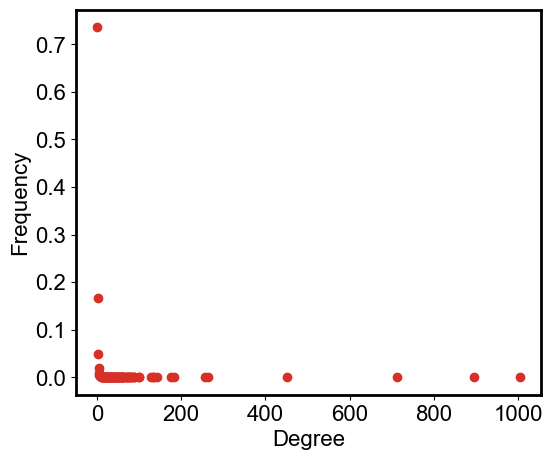

In [7]:
plt.rc('font',family='Arial')

degree_x=tuple(set(degree))
degree_y=tuple([degree.count(i)/len(degree) for i in degree_x])
# degree_x,degree_y

plt.figure(figsize=[6,5])
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Degree',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.scatter(degree_x,degree_y,color=['#d73027'])

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.show()

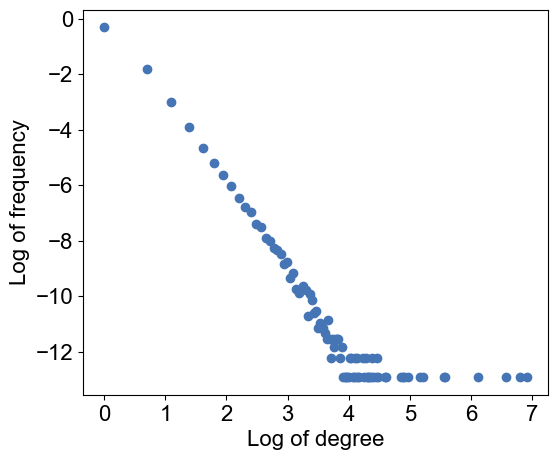

In [8]:
import math
from scipy import optimize

degree_x_ = np.array([math.log(i) for i in degree_x]) 
degree_y_ = np.array([math.log(i) for i in degree_y])
plt.figure(figsize=[6,5])
# plt.xscale('log')
# plt.yscale('log') 
# plt.title('')
plt.ylabel('Log of frequency',fontsize=16)
plt.xlabel('Log of degree',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.scatter(degree_x_,degree_y_,color=['#4575b4'])
plt.show()

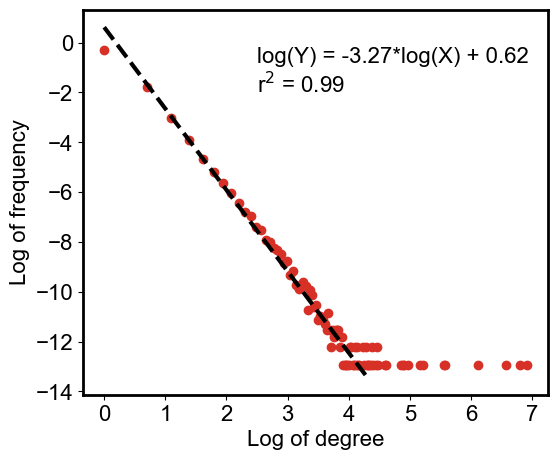

In [9]:
from sklearn.metrics import r2_score
plt.figure(figsize=[6,5])
plt.scatter(degree_x_,degree_y_,color=['#d73027'])

x=[i for i in degree_x_ if i<=4]
y=[degree_y_[i] for i in range(len(degree_y_)) if degree_x_[i]<=4]

slope, intercept = np.polyfit(x, y, 1)

pred=[]
for i in x:
    pred.append(slope * i + intercept)
r2=r2_score(y, pred)

x.append(4.3)
x=np.array(x)
plt.plot(x, slope * x + intercept, color='black',linestyle='dashed',linewidth=3)
plt.ylabel('Log of frequency',fontsize=16)
plt.xlabel('Log of degree',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.text(x=2.5,y=-2, s='log(Y) = %.2f*log(X) + %.2f\nr$^2$ = %.2f'%(slope,intercept,r2), fontsize=16)
plt.show()

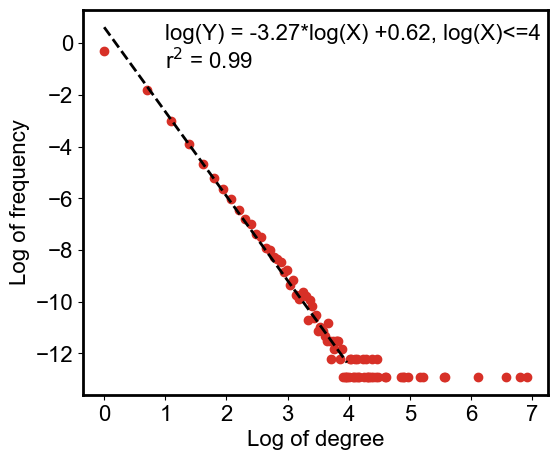

In [10]:
from sklearn.metrics import r2_score
plt.figure(figsize=[6,5])
plt.scatter(degree_x_,degree_y_,color=['#d73027'])

x=[i for i in degree_x_ if i<=4]
y=[degree_y_[i] for i in range(len(degree_y_)) if degree_x_[i]<=4]
# x=[i for i in degree_x_]
# y=[degree_y_[i] for i in range(len(degree_y_))]
slope, intercept = np.polyfit(x, y, 1)

pred=[]
for i in x:
    pred.append(slope * i + intercept)
r2=r2_score(y, pred)

# x.append(4.3)
x=np.array(x)
plt.plot(x, slope * x + intercept, color='black',linestyle='dashed',linewidth=2)
plt.ylabel('Log of frequency',fontsize=16)
plt.xlabel('Log of degree',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

bwith = 2 
ax = plt.gca()
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.text(x=1,y=-1, s='log(Y) = %.2f*log(X) +%.2f, log(X)<=4\nr$^2$ = %.2f'%(slope,intercept,r2), fontsize=16)
plt.show()